### QUESTIONS:
1. Predict whether or not a pokemon is a legendary by ulitizing the Total column. (k-Nearest Neighbor)
2. Predict the attack of a pokemon given its defense. (Linear Regression)

### CODE

In [112]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

Other libraries / functions from libraries needed beyond those required in the assignment.

In [113]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

The following code loads in the Pokemon CSV file and cleans up its data. The steps I have used to clean the data are to first fill in the Type 2 column blank values with "None" and then delete all rows with a missing value.

In [114]:
dataframe = pd.read_csv('Datasets/Pokemon.csv')
dataframe["Type 2"] = dataframe["Type 2"].fillna("None")
dataframe = dataframe.dropna(axis=0, inplace=False)
dataframe

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


#### CLASSIFICATION QUESTION (Prediction) 1
1. Predict whether or not a pokemon is a legendary by ulitizing the Total column. (k-Nearest Neighbor)

- Feature: *Total Column Variable* which is the sum of a specific Pokemon's HP, Attack, Defense, Sp. Attack, Sp. Defense, and Speed

- Dependent Variable: *Legendary* which is a boolean value determining whether or not the Pokemon is a legendary

In [115]:
x = dataframe[['Total']]
y = dataframe[['Legendary']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

In [116]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train.values.ravel())
model.score(x_train, y_train)

0.9589285714285715

In [117]:
bool(model.predict([[690]])[0])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


True

#### REGRESSION QUESTION (Prediction) 2
2. Predict the attack of a pokemon given its defense. (Linear Regression)

- Feature: *Defense* Stat of the Pokemon

- Dependent Variable: *Attack* Stat of the Pokemon

In [118]:
x = dataframe[['Defense']]
y = dataframe[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

In [119]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.19268339365792075

**Journal Entry:** The above was the standard code for my required Linear Regression model that analyzes the correlation between the defense and attack powers of Pokemon. Given that my r^2 value was absolutely horrendous (0.193), I wanted to visualize the dataset and look using my own human eyes to see if I could figure out what the correlation between the data would be (shown in the figure resulting from the code below). It looks very linear, but it can also be noted that there are still plenty of outliers. My next steps are to filter through the data even more and remove the outliers.

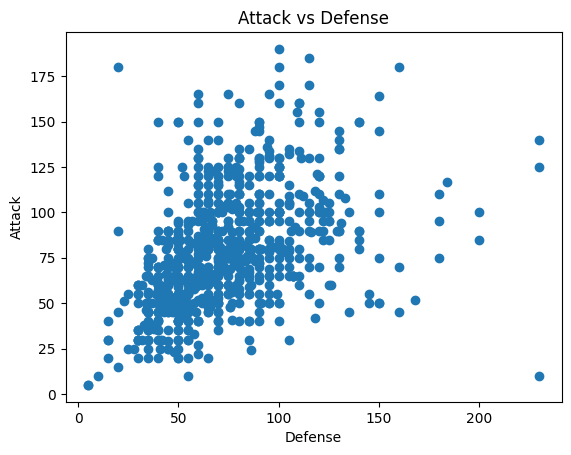

In [120]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
ax.set_xlabel('Defense')
ax.set_ylabel('Attack')
ax.set_title('Attack vs Defense')
plt.show()

**Journal Entry:** The following is the newly evaluated code to remove the outliers and see what the result is.

In [121]:
Q1_def = dataframe['Defense'].quantile(0.25)
Q3_def = dataframe['Defense'].quantile(0.75)
IQR_def = Q3_def - Q1_def
lower_def = Q1_def - 1.5 * IQR_def
upper_def = Q3_def + 1.5 * IQR_def

Q1_att = dataframe['Attack'].quantile(0.25)
Q3_att = dataframe['Attack'].quantile(0.75)
IQR_att = Q3_att - Q1_att
lower_att = Q1_att - 1.5 * IQR_att
upper_att = Q3_att + 1.5 * IQR_att

dataframe_no_outliers = dataframe[
    (dataframe['Defense'] >= lower_def) & (dataframe['Defense'] <= upper_def) &
    (dataframe['Attack'] >= lower_att) & (dataframe['Attack'] <= upper_att)
]

In [122]:
x = dataframe_no_outliers[['Defense']]
y = dataframe_no_outliers[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

In [123]:
dataframe_no_outliers

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [124]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.24058478155153495

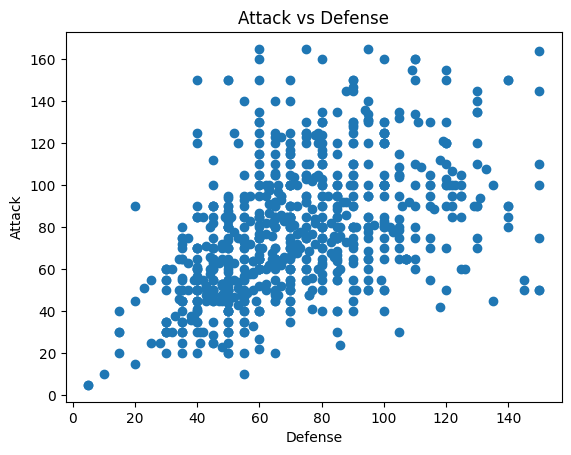

In [125]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
ax.set_xlabel('Defense')
ax.set_ylabel('Attack')
ax.set_title('Attack vs Defense')
plt.show()

**Journal Entry:** After removing the outliers from the data and still having such a low score (0.241), it became obvious to me that Linear Regression may not be the best algorithm to utilize in order to best find a correlation between the defense and attack. The next few cells of code are me switching models to a polynomial regression algorithm (which includes me trying to frantically change the degree and see if it fares any better).

In [126]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

model = LinearRegression()
model.fit(x_train_poly, y_train)
model.score(x_train_poly, y_train)

0.278099927678624

**Journal Entry:** It was an endeavor with very little success (scores for many degrees were all around 0.279-ish). Polynomial Regression just was not working. I will now move on to trying out Logarithm Regressions, though, by looking at the data, I don't expect much more to come from the Logarithm Regression.

In [127]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [128]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train.values.ravel())
model.score(x_train_scaled, y_train)

0.07875457875457875

In [129]:
x_transformed = np.log(x)

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.26676837302306455

**Journal Entry:** Well that didn't work well...as expected! Below are a few more different models ChatGPT 5 recommended and coded, but when I tried to get it working, I faced little success. I have come to the conclusion that the feature and the dependent variable are not correlated and may not be predicted using these simpler (and I use this loosely) algorithms. In order to redeem myself, however, I will redo a lot of this code for another pair of (hopefully) correlating values.

##### Random Forest Regressor:

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

x = dataframe_no_outliers[["Defense"]]   # feature
y = dataframe_no_outliers["Attack"]      # target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val,  x_test, y_val,  y_test  = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

# Random Forest model
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(x_train, y_train)

# Evaluate
print("Validation R^2:", model.score(x_val, y_val))
print("Test R^2:", model.score(x_train, y_train))


Validation R^2: 0.18387049363952546
Test R^2: 0.3733124488143821


##### Decision Tree Regressor:

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1) Features and target
X = dataframe_no_outliers[["Defense"]]     # predictor
y = dataframe_no_outliers["Attack"]        # target

# 2) Split into train / val / test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
x_val,  x_test, y_val,  y_test  = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

# 3) Create Decision Tree model
model = DecisionTreeRegressor(
    max_depth=6,          # limit depth (prevents overfitting)
    min_samples_leaf=5,   # require at least 5 samples per leaf
    random_state=42
)

# 4) Fit the model
model.fit(x_train, y_train)

# 5) Evaluate
print("Validation R^2:", model.score(x_val, y_val))
print("Test R^2:",       model.score(x_train, y_train))


Validation R^2: 0.15673092563232638
Test R^2: 0.3336654431067291


##### MLP Regression Neural Network:

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# 1) Features and target
X = dataframe_no_outliers[["Defense"]]   # predictor
y = dataframe_no_outliers["Attack"]      # target

# 2) Train / Val / Test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
x_val,  x_test, y_val,  y_test  = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

# 3) Build pipeline: scale data -> feed to MLP
model = make_pipeline(
    StandardScaler(),   # scaling is VERY important for neural nets
    MLPRegressor(
        hidden_layer_sizes=(64, 32),  # 2 hidden layers (64 → 32 neurons)
        activation="relu",            # standard non-linear activation
        solver="adam",                # robust optimizer
        learning_rate="adaptive",     # shrink learning rate when training stalls
        max_iter=500,                 # max training epochs
        early_stopping=True,          # stop if val score stops improving
        n_iter_no_change=20,          # patience
        random_state=42
    )
)

# 4) Fit model
model.fit(x_train, y_train)

# 5) Evaluate
print("Validation R^2:", model.score(x_val, y_val))
print("Test R^2:",       model.score(x_train, y_train))


Validation R^2: 0.24549771475843807
Test R^2: 0.2639675566916887


**Journal Entry:** I am going to try revising my question a little bit to see if attack and the total correlate (given that the attack is a part of the total). Predict the attack of the Pokemon given the total.

In [133]:
Q1_def = dataframe['Total'].quantile(0.25)
Q3_def = dataframe['Total'].quantile(0.75)
IQR_def = Q3_def - Q1_def
lower_def = Q1_def - 1.5 * IQR_def
upper_def = Q3_def + 1.5 * IQR_def

Q1_att = dataframe['Attack'].quantile(0.25)
Q3_att = dataframe['Attack'].quantile(0.75)
IQR_att = Q3_att - Q1_att
lower_att = Q1_att - 1.5 * IQR_att
upper_att = Q3_att + 1.5 * IQR_att

dataframe_no_outliers = dataframe[
    (dataframe['Total'] >= lower_def) & (dataframe['Total'] <= upper_def) &
    (dataframe['Attack'] >= lower_att) & (dataframe['Attack'] <= upper_att)
]

In [134]:
x = dataframe_no_outliers[['Total']]
y = dataframe_no_outliers[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

In [135]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.5273976962095139

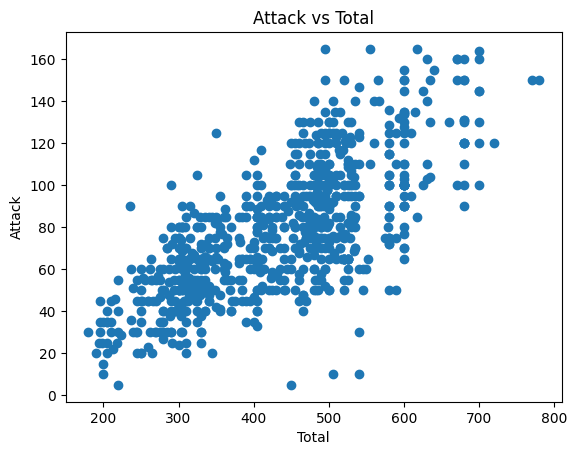

In [136]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
ax.set_xlabel('Total')
ax.set_ylabel('Attack')
ax.set_title('Attack vs Total')
plt.show()

**Journal Entry:** These 2 values appear to correlate much better than the previous 2 (r^2 = 0.527). I'd assume this is due to Attack being itself a part of the Total. This, however, uses the dataset with the outliers removed. I am curious as to see what happens if I were to use the dataset with only the original cleaning from the very beginning of the code.

In [137]:
x = dataframe[['Total']]
y = dataframe[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

In [138]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.5325185948331481

**Journal Entry:** I have decided to stick with not removing the outliers as it has a higher correlation coefficient value (0.533) than that of the previous. The thing is, just changing my question to "Predict the attack of a pokemon given its total" feels wrong for the very reason that attack is a part of total. I will keep this in my back pocket while continuing to move forward with my previous question. The below code is my further attempt with the previous question to limit the data even more (using types of pokemon) and get a correlation between Defense and Attack.

In [139]:
dataframe_only_type = dataframe_no_outliers[dataframe_no_outliers['Type 1'] == 'Dragon']

x = dataframe_only_type[['Defense']]
y = dataframe_only_type[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

In [140]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.26726045585221603

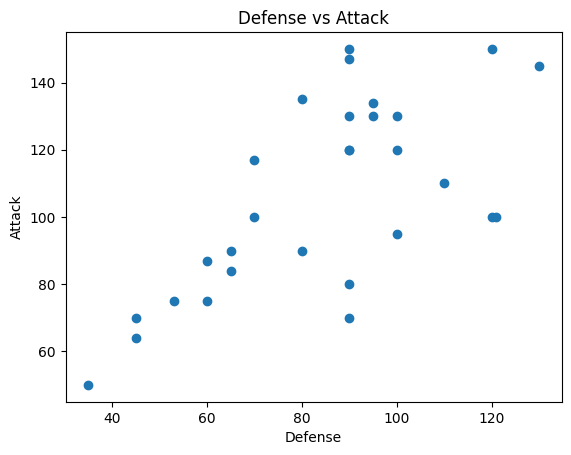

In [141]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
ax.set_xlabel('Defense')
ax.set_ylabel('Attack')
ax.set_title('Defense vs Attack')
plt.show()

**Journal Entry:** Even by limiting the data to specific types doesn't appear to universally help as when doing so for grass types, the r^2 value results in 0.267, which isn't bad compared to what it was; however, when comparing the defense and attack of rock types, the r^2 value is -0.098. I supposes this great variance in accuracy depending on the type is causing the overall score to be low when considering all types. Some types appear to have a correlation while others don't. This does make me curious as to which types are the best correlating and which are the worst.

In [142]:
types = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel']
for type in types:
    dataframe_only_type = dataframe_no_outliers[dataframe_no_outliers['Type 1'] == type]

    x = dataframe_only_type[['Defense']]
    y = dataframe_only_type[['Attack']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

    model = LinearRegression()
    model.fit(x_train, y_train)
    print(f"{type} r^2 value: {model.score(x_train, y_train)}")

Grass r^2 value: 0.3498005196407399
Fire r^2 value: 0.09017677414141423
Water r^2 value: 0.24979773336289313
Bug r^2 value: 0.05888375082445396
Normal r^2 value: 0.5077149361743798
Poison r^2 value: 0.17294206497556996
Electric r^2 value: 0.15302158745010486
Ground r^2 value: 0.24752031957331433
Fairy r^2 value: 0.298581146080811
Fighting r^2 value: 0.47485216817257514
Psychic r^2 value: 0.24153639407921468
Rock r^2 value: 2.796638626234582e-07
Ghost r^2 value: 0.082328211303349
Ice r^2 value: 0.42509949321959895
Dragon r^2 value: 0.26726045585221603
Dark r^2 value: 0.21381386580231332
Steel r^2 value: 0.06483388677430835


**Journal Entry:** Hello world, this appears to be my final journal entry. Having printed out the r^2 value for every Pokemon type, there is no type that truly does well. Having tried cutting out the outliers, various models, and limiting the data based upon the type of Pokemon, I was still not able to get the Regression models above an R^2 value of 0.55. Given all of this, I have deduced that there is no apparent correlation between defense and attack in Pokemon; however, when considering my other question to just mess around with the relationship between total and attack, there is a slight relationship. The problem comes in that attack itself is a part of the total, so it feels...just wrong to use that question either way. In conclusion, the relationship may not be properly modeled using regression models, and may require a much more advanced algorithm.

#### VALIDATION PHASE FOR REGRESSION QUESTION

The code below this is all to validate whether or not the models that have been created work properly on data that it was not trained on.

In [143]:
dataframe_only_type = dataframe_no_outliers[dataframe_no_outliers['Type 1'] == "Normal"] # I have chosen normal since it has the highest r^2 value in my previous evaluations

x = dataframe_only_type[['Defense']]
y = dataframe_only_type[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.33, random_state=42)

poly = PolynomialFeatures(degree=8)
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)
x_test_poly = poly.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)
model.score(x_train_poly, y_train)

0.621571621246436

##### BASIC ERROR CALCULATIONS

In [144]:
r_squared_train = model.score(x_train_poly, y_train)
mse_train = mean_squared_error(y_train, model.predict(x_train_poly))
mae_train = mean_absolute_error(y_train, model.predict(x_train_poly))
rmse_train = np.sqrt(mse_train)

print(f"R^2 value (training): {r_squared_train}")
print(f"MSE value (training): {mse_train}")
print(f"MAE value (training): {mae_train}")
print(f"RMSE value (training): {rmse_train}")

R^2 value (training): 0.621571621246436
MSE value (training): 302.4457054711695
MAE value (training): 13.564684527661766
RMSE value (training): 17.390966202921835


In [145]:
r_squared_val = model.score(x_val_poly, y_val)
mse_val = mean_squared_error(y_val, model.predict(x_val_poly))
mae_val = mean_absolute_error(y_val, model.predict(x_val_poly))
rmse_val = np.sqrt(mse_val)

print(f"R^2 value (validation): {r_squared_val}")
print(f"MSE value (validation): {mse_val}")
print(f"MAE value (validation): {mae_val}")
print(f"RMSE value (validation): {rmse_val}")

R^2 value (validation): 0.6036795538798263
MSE value (validation): 577.6875810770334
MAE value (validation): 20.87063888669843
RMSE value (validation): 24.03513222507905


In [146]:
x_trainval_merged = pd.concat([pd.DataFrame(x_train_poly), pd.DataFrame(x_val_poly)]).reset_index(drop=True)
y_trainval_merged = pd.concat([y_train, y_val]).reset_index(drop=True)
cv_scores = cross_val_score(model, x_trainval_merged, y_trainval_merged, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validated MSE: {-cv_scores.mean()}")

Cross-validation scores: [ -398.13971092  -268.30719221 -2046.87146856  -396.3300629
  -516.7724766 ]
Mean cross-validated MSE: 725.2841822354164


In [147]:
r_squared_test = model.score(x_test_poly, y_test)
mse_test = mean_squared_error(y_test, model.predict(x_test_poly))
mae_test = mean_absolute_error(y_test, model.predict(x_test_poly))
rmse_test = np.sqrt(mse_test)

print(f"R^2 value (test): {r_squared_test}")
print(f"MSE value (test): {mse_test}")
print(f"MAE value (test): {mae_test}")
print(f"RMSE value (test): {rmse_test}")

R^2 value (test): 0.07040146105400258
MSE value (test): 302.640100339259
MAE value (test): 13.754465884271728
RMSE value (test): 17.396554266269483


In [148]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Set up KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through the folds
for i, (train_index, test_index) in enumerate(kf.split(x_trainval_merged)):
    x_train_fold, x_test_fold = x_trainval_merged.iloc[train_index], x_trainval_merged.iloc[test_index]
    y_train_fold, y_test_fold = y_trainval_merged.iloc[train_index], y_trainval_merged.iloc[test_index]
    
    model.fit(x_train_fold, y_train_fold)
    y_pred = model.predict(x_test_fold)
    
    mse = mean_squared_error(y_test_fold, y_pred)
    
    if i == 0:  # Third fold (index starts at 0)
        print(f"Fold {i+1} MSE: {mse}")
        print("True values:", y_test_fold.values)
        print("Predicted values:", y_pred)
        break


Fold 1 MSE: 369.36440616278264
True values: [[128]
 [ 81]
 [ 80]
 [ 70]
 [ 85]
 [ 10]
 [ 80]
 [ 45]
 [ 60]
 [ 85]
 [110]
 [ 65]
 [ 77]
 [130]
 [ 70]
 [ 83]
 [ 70]
 [ 80]]
Predicted values: [[102.19474516]
 [ 77.81588169]
 [102.19474516]
 [ 86.53260616]
 [ 59.91849822]
 [ 21.78715398]
 [ 82.53908107]
 [ 59.91849822]
 [ 77.81588169]
 [109.40038344]
 [ 86.53260616]
 [ 82.53908107]
 [ 79.795388  ]
 [ 89.97127995]
 [ 59.91849822]
 [ 66.34631741]
 [ 86.53260616]
 [ 93.26667596]]
